In [8]:
#this dataset is an old automobile dataset and in this project,
#i want to show how some features correlate with each other and also show which feature(s) best correlates with the feature 
# "engine-size"

In [10]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(12,8)

In [5]:
#read-in data

filePath=(r'C:\Users\MRS OLAYINKA\Desktop\DATASETS\auto_clean.csv')
df=pd.read_csv(filePath)


In [6]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [7]:
#displaying whole dataset

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.470000,2.68,9.00,111.000000,5000.000000,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.470000,2.68,9.00,111.000000,5000.000000,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.680000,3.47,9.00,154.000000,5000.000000,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.190000,3.40,10.00,102.000000,5500.000000,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.190000,3.40,8.00,115.000000,5500.000000,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.190000,3.40,8.50,110.000000,5500.000000,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.130000,3.40,8.30,140.000000,5500.000000,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.500000,2.80,8.80,101.000000,5800.000000,23,29,16430.0,10.217391,Low,0,1


In [11]:
#DATA CLEANING

# 1. checking for nulls a 'for loop'


for col in df.columns:
    missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,missing))



symboling-0.0%
normalized-losses-0.0%
make-0.0%
aspiration-0.0%
num-of-doors-0.0%
body-style-0.0%
drive-wheels-0.0%
engine-location-0.0%
wheel-base-0.0%
length-0.0%
width-0.0%
height-0.0%
curb-weight-0.0%
engine-type-0.0%
num-of-cylinders-0.0%
engine-size-0.0%
fuel-system-0.0%
bore-0.0%
stroke-0.01990049751243781%
compression-ratio-0.0%
horsepower-0.0%
peak-rpm-0.0%
city-mpg-0.0%
highway-mpg-0.0%
price-0.0%
city-L/100km-0.0%
horsepower-binned-0.004975124378109453%
diesel-0.0%
gas-0.0%


In [12]:
# 2 columns('stroke' and 'horsepower-binned') contain nulls but they'll be left cos they won't be used in the project

In [13]:
# 2. checking for duplicates

df.duplicated().sum()

0

In [15]:
#CORRELATION
#checking numerical features that best correlate with 'engine-size' using 3 different correlation matrix method

#method 1 (pearson)

df.corr(method="pearson")




,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [16]:
#method 2. Kendall

df.corr(method='kendall')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.375720,-0.413205,-0.296122,-0.177592,-0.418942,-0.179961,-0.144436,-0.142360,-0.002349,0.023644,-0.012184,0.225972,-0.010302,0.038665,-0.104866,0.010302,-0.190877,0.190877
normalized-losses,0.375720,1.000000,-0.045157,0.028482,0.078305,-0.247791,0.079149,0.087686,-0.021958,0.078688,-0.050537,0.158850,0.175705,-0.182678,-0.145752,0.134911,0.182678,-0.080923,0.080923
wheel-base,-0.413205,-0.045157,1.000000,0.746966,0.656894,0.468104,0.609645,0.501344,0.409432,0.142993,-0.102371,0.367888,-0.224587,-0.366512,-0.403542,0.540313,0.366512,0.231086,-0.231086
length,-0.296122,0.028482,0.746966,1.000000,0.725730,0.380968,0.722186,0.599280,0.499211,0.107753,-0.134273,0.478809,-0.185232,-0.500317,-0.524061,0.636420,0.500317,0.159724,-0.159724
width,-0.177592,0.078305,0.656894,0.725730,1.000000,0.271977,0.680153,0.584820,0.446336,0.156687,-0.107198,0.505921,-0.147418,-0.507807,-0.518473,0.638911,0.507807,0.198105,-0.198105
height,-0.418942,-0.247791,0.468104,0.380968,0.271977,1.000000,0.254437,0.161993,0.160424,-0.021545,-0.012685,0.021840,-0.196572,-0.057001,-0.098166,0.182387,0.057001,0.245611,-0.245611
curb-weight,-0.179961,0.079149,0.609645,0.722186,0.680153,0.254437,1.000000,0.720936,0.537937,0.122862,-0.166549,0.619200,-0.167963,-0.644569,-0.670616,0.744265,0.644569,0.161817,-0.161817
engine-size,-0.144436,0.087686,0.501344,0.599280,0.584820,0.161993,0.720936,1.000000,0.532226,0.203609,-0.184297,0.660682,-0.199354,-0.584316,-0.579671,0.661342,0.584316,0.111066,-0.111066
bore,-0.142360,-0.021958,0.409432,0.499211,0.446336,0.160424,0.537937,0.532226,1.000000,-0.059778,-0.137246,0.472928,-0.223067,-0.450015,-0.460463,0.489625,0.450015,0.037211,-0.037211
stroke,-0.002349,0.078688,0.142993,0.107753,0.156687,-0.021545,0.122862,0.203609,-0.059778,1.000000,-0.029412,0.109124,-0.033302,-0.024057,-0.028546,0.094153,0.024057,0.267877,-0.267877


In [17]:
#method 3. spearman

df.corr(method='spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.180029,-0.011853,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683,0.021918,-0.211858,0.211858
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.022405,0.108541,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034,0.258637,-0.096539,0.096539
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.537537,0.218058,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790,0.484472,0.277773,-0.277773
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639575,0.172721,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331,0.661012,0.193300,-0.193300
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.606621,0.237730,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097,0.673376,0.236686,-0.236686
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.222777,-0.036640,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806,0.079883,0.295966,-0.295966
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702016,0.157342,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767,0.805613,0.197509,-0.197509
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.697316,0.292904,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417,0.722111,0.133217,-0.133217
bore,-0.180029,-0.022405,0.537537,0.639575,0.606621,0.222777,0.702016,0.697316,1.000000,-0.083457,-0.169436,0.640574,-0.305171,-0.607415,-0.619292,0.645943,0.607415,0.044483,-0.044483
stroke,-0.011853,0.108541,0.218058,0.172721,0.237730,-0.036640,0.157342,0.292904,-0.083457,1.000000,-0.053223,0.139188,-0.066993,-0.023552,-0.019877,0.117582,0.023552,0.320694,-0.320694


In [20]:
#unstacking the correlation matrix(this makes correlation easier to read and understand)

corr_matrix=df.corr()
corr_pairs=corr_matrix.unstack()
corr_pairs

symboling          symboling            1.000000
                   normalized-losses    0.466264
                   wheel-base          -0.535987
                   length              -0.365404
                   width               -0.242423
                   height              -0.550160
                   curb-weight         -0.233118
                   engine-size         -0.110581
                   bore                -0.140019
                   stroke              -0.008245
                   compression-ratio   -0.182196
                   horsepower           0.075819
                   peak-rpm             0.279740
                   city-mpg            -0.035527
                   highway-mpg          0.036233
                   price               -0.082391
                   city-L/100km         0.066171
                   diesel              -0.196735
                   gas                  0.196735
normalized-losses  symboling            0.466264
                   n

In [24]:
#sorting the features to appear side by side in order of increasing correlation

sort=corr_pairs.sort_values()
sort

gas                diesel              -1.000000
diesel             gas                 -1.000000
gas                compression-ratio   -0.985231
compression-ratio  gas                 -0.985231
city-mpg           city-L/100km        -0.949713
city-L/100km       city-mpg            -0.949713
highway-mpg        city-L/100km        -0.930028
city-L/100km       highway-mpg         -0.930028
city-mpg           horsepower          -0.822214
horsepower         city-mpg            -0.822214
                   highway-mpg         -0.804575
highway-mpg        horsepower          -0.804575
curb-weight        highway-mpg         -0.794889
highway-mpg        curb-weight         -0.794889
city-mpg           curb-weight         -0.749543
curb-weight        city-mpg            -0.749543
highway-mpg        price               -0.704692
price              highway-mpg         -0.704692
highway-mpg        length              -0.698142
length             highway-mpg         -0.698142
price              c

In [25]:
#sorting pairs with high correlation (correlation of >0.7 for this project)

high_corr=sort[(sort)>0.7]
high_corr

engine-size        width                0.729436
width              engine-size          0.729436
city-L/100km       engine-size          0.745059
engine-size        city-L/100km         0.745059
width              price                0.751265
price              width                0.751265
curb-weight        horsepower           0.757976
horsepower         curb-weight          0.757976
curb-weight        wheel-base           0.782097
wheel-base         curb-weight          0.782097
city-L/100km       curb-weight          0.785353
curb-weight        city-L/100km         0.785353
price              city-L/100km         0.789898
city-L/100km       price                0.789898
price              horsepower           0.809575
horsepower         price                0.809575
wheel-base         width                0.814507
width              wheel-base           0.814507
horsepower         engine-size          0.822676
engine-size        horsepower           0.822676
curb-weight        p

In [26]:
#from the above list, 3 of the many features that show high correlation with "engine-size" are
# "horsepower" , "curb-weight" and "price"

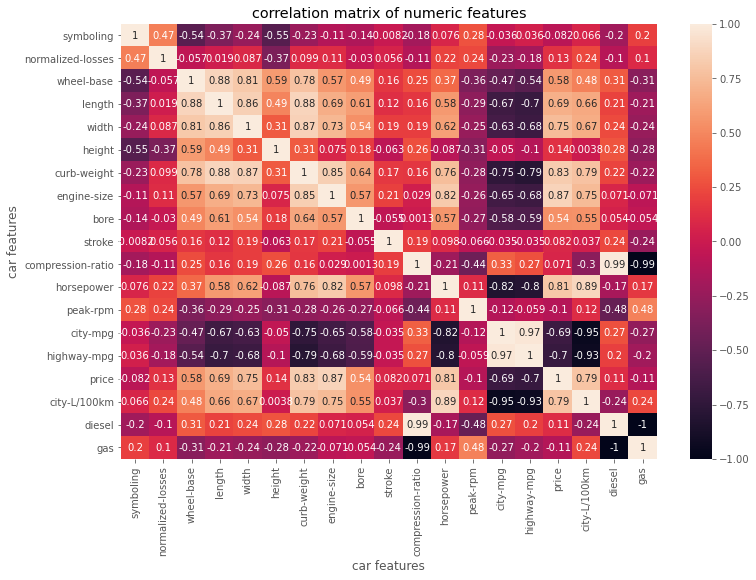

In [28]:
#showing some viz to see how well these features correlate with each other

#method 1: Correlation matrix heatmap

corr_mat=df.corr(method="pearson")
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix of numeric features")
plt.xlabel("car features")
plt.ylabel("car features")
plt.show()

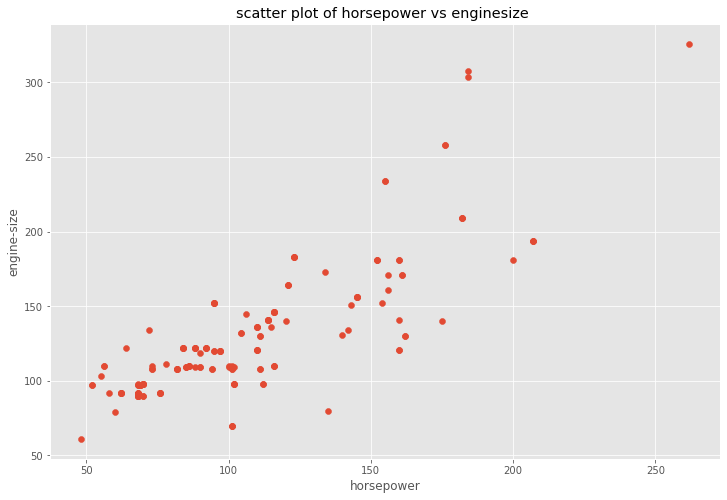

In [31]:
#method 2: scatter plots of the 3 different features against "engine-size"

#feature 1: "horsepower"

plt.scatter(x=df["horsepower"],y=df["engine-size"])
plt.title("scatter plot of horsepower vs enginesize ")
plt.xlabel("horsepower")
plt.ylabel("engine-size")
plt.show()

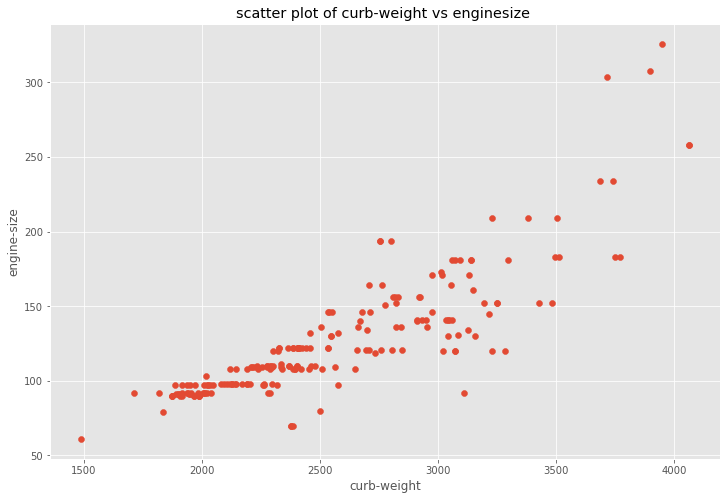

In [32]:
#feature 2: "curb-weight"

plt.scatter(x=df["curb-weight"],y=df["engine-size"])
plt.title("scatter plot of curb-weight vs enginesize ")
plt.xlabel("curb-weight")
plt.ylabel("engine-size")
plt.show()

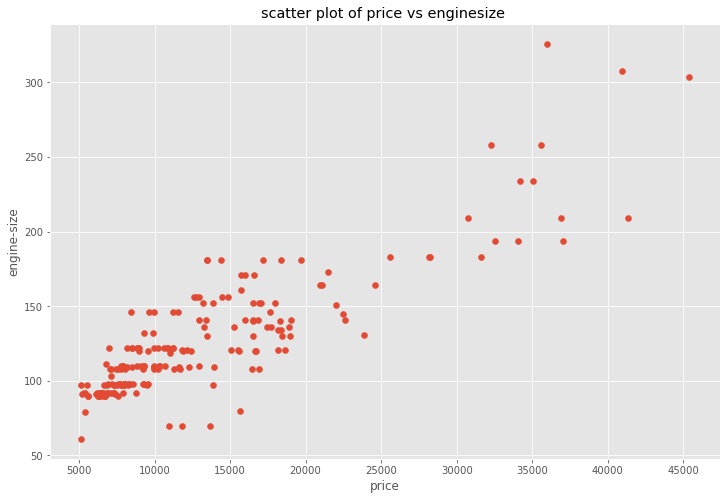

In [33]:
#feature 3: "price"

plt.scatter(x=df["price"],y=df["engine-size"])
plt.title("scatter plot of price vs enginesize ")
plt.xlabel("price")
plt.ylabel("engine-size")
plt.show()

In [34]:
# the scatter plots above show that all 3 features are well-correlated with the feature "engine-size"

<AxesSubplot:xlabel='horsepower', ylabel='engine-size'>

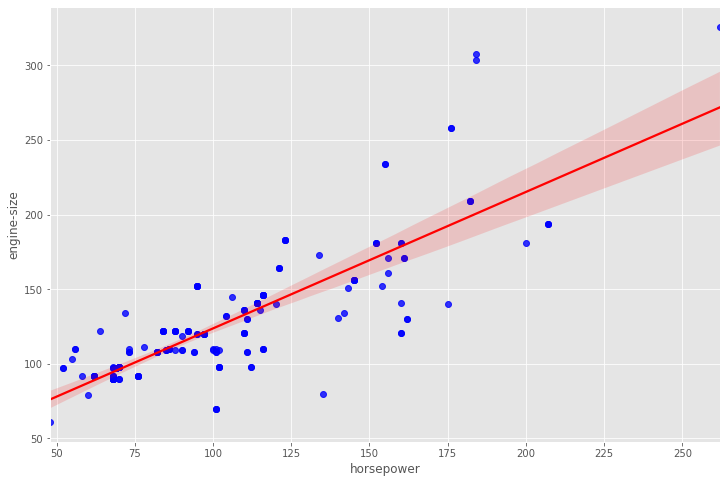

In [36]:
#viz method 2 : Regression plots. (shows the type of correlation the features have)

#feature 1: 'horsepower'

sns.regplot(x=df["horsepower"],y=df["engine-size"],data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})

<AxesSubplot:xlabel='curb-weight', ylabel='engine-size'>

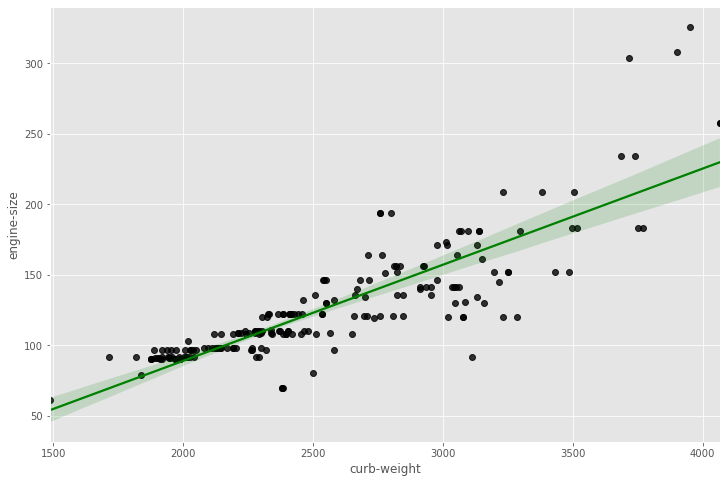

In [37]:
#feature 2: 'curb-weight'

sns.regplot(x=df["curb-weight"],y=df["engine-size"],data=df,scatter_kws={"color":"black"},line_kws={"color":"green"})

<AxesSubplot:xlabel='price', ylabel='engine-size'>

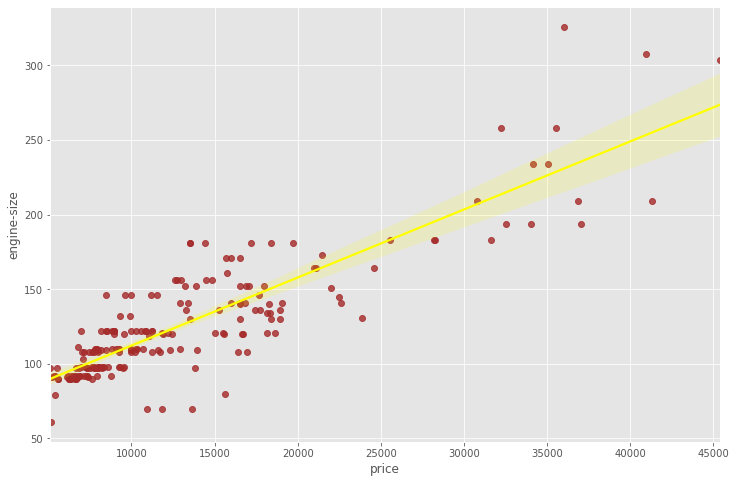

In [39]:
#feature 3: 'price'

sns.regplot(x=df["price"],y=df["engine-size"],data=df,scatter_kws={"color":"brown"},line_kws={"color":"yellow"})

In [40]:
#the regression plots above show that there exists +ve correlation between each feature with 'engine-size'

In [49]:
#showing some correlation statistics (correlation coefficient and P-value)

import scipy.stats

In [55]:
#feature 1: 'horsepower' (using pearson method)

 
scipy.stats.pearsonr(x=df["horsepower"],y=df["engine-size"])


(0.8226756460813216, 1.0684451873188924e-50)

In [56]:
#feature 2: 'curb-weight' (using kendall method)

scipy.stats.kendalltau(x=df["curb-weight"],y=df["engine-size"])

KendalltauResult(correlation=0.7209359032448831, pvalue=2.823089515081543e-50)

In [59]:
#feature 3: 'price' (using spearman method)

x=df["price"]
y=df["engine-size"]

scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.8284166701310954, pvalue=5.488935437858883e-52)

In [60]:
#this stats show that all 3 features have (i)strong +ve correlations and (ii)high certainty of strong +ve correlations with
#the feature 'engine-size' .

In [69]:
path="C:/Users/MRS OLAYINKA/Desktop/DATASETS/correlation.csv"

In [71]:
df.to_csv(path)